In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#importing the dataset
path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"
df = pd.read_csv(path)
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


#### Analyzing feature patterns of individual columns

Selecting only numric columns

In [6]:
types=  ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=types)
colums = numeric_df.columns
numeric_df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,0,1
197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,0,1
198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,0,1
199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,1,0


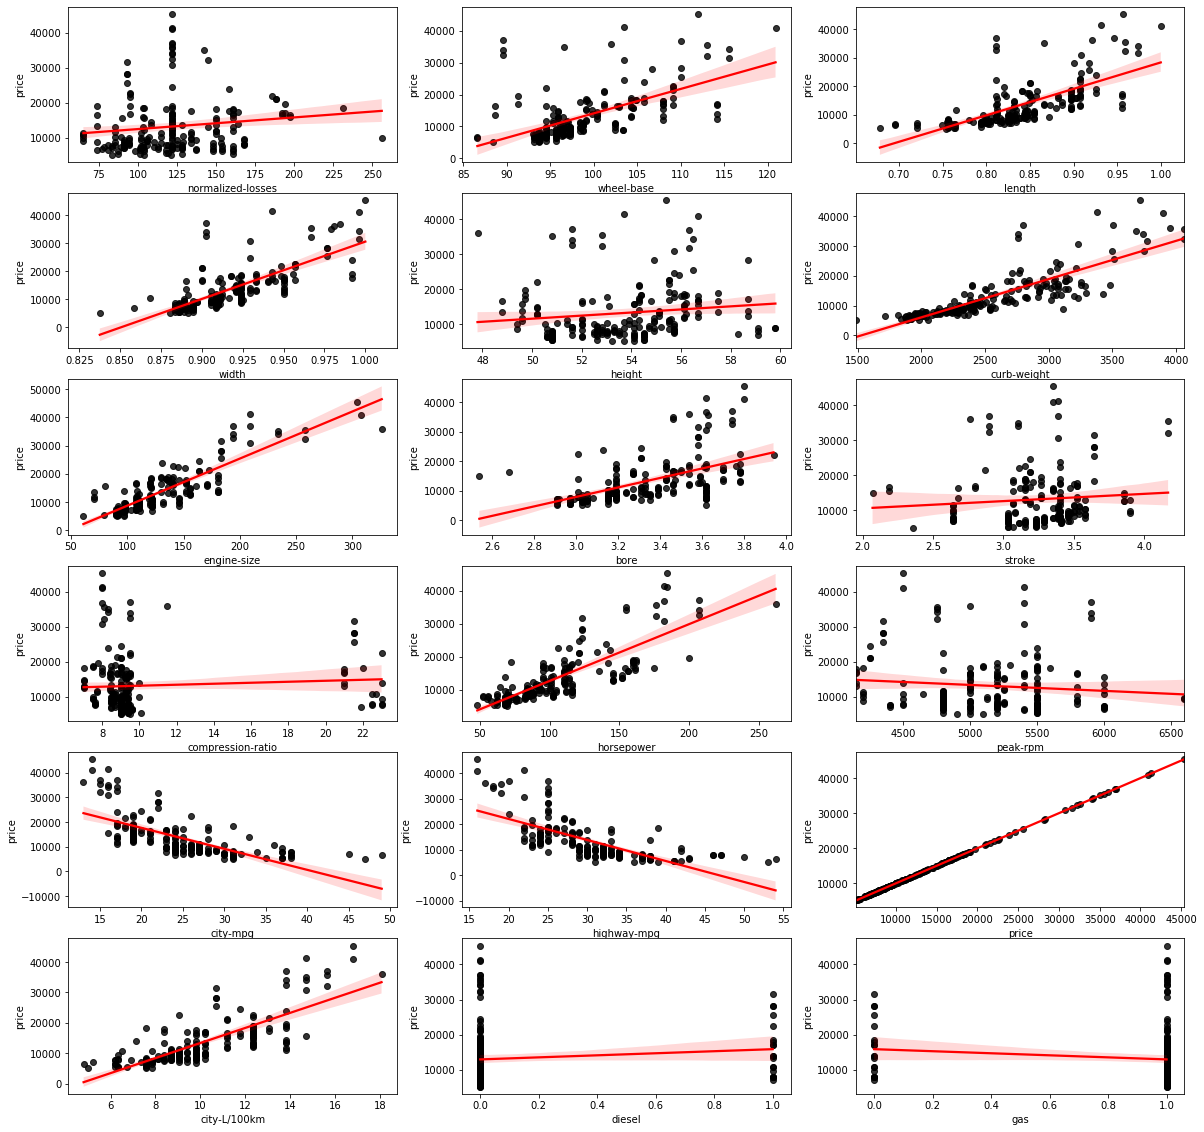

In [7]:
fig , axes = plt.subplots(6,3,figsize=(20,20))
count = 0
for i in range(6):
    for j in range(3):
        count +=1
        sns.regplot(x=colums[count],y = 'price',data=numeric_df,ax = axes[i,j],
                    scatter_kws={"color":"black"},line_kws={"color":"red"})
        

From the above result we can conclude that :

<b>Positive relationship:</b>
- Wheel-base
- Length
- Width
- Curb weight
- Engine size
- Bore
- Horse power

<b>Negative Relationship:</b>
- Highway mpg
- City mpg


<b>No Relationship:</b>
- Peak rpm
- Stroke
- Compression ratio
- Height

### 2. Categorical Variable

In [13]:
df_cat = df[["make","aspiration","num-of-doors","body-style","drive-wheels","engine-location","engine-type","fuel-system","num-of-cylinders","horsepower-binned"]]
df_cat.head(5)

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,fuel-system,num-of-cylinders,horsepower-binned
0,alfa-romero,std,two,convertible,rwd,front,dohc,mpfi,four,Medium
1,alfa-romero,std,two,convertible,rwd,front,dohc,mpfi,four,Medium
2,alfa-romero,std,two,hatchback,rwd,front,ohcv,mpfi,six,Medium
3,audi,std,four,sedan,fwd,front,ohc,mpfi,four,Medium
4,audi,std,four,sedan,4wd,front,ohc,mpfi,five,Medium


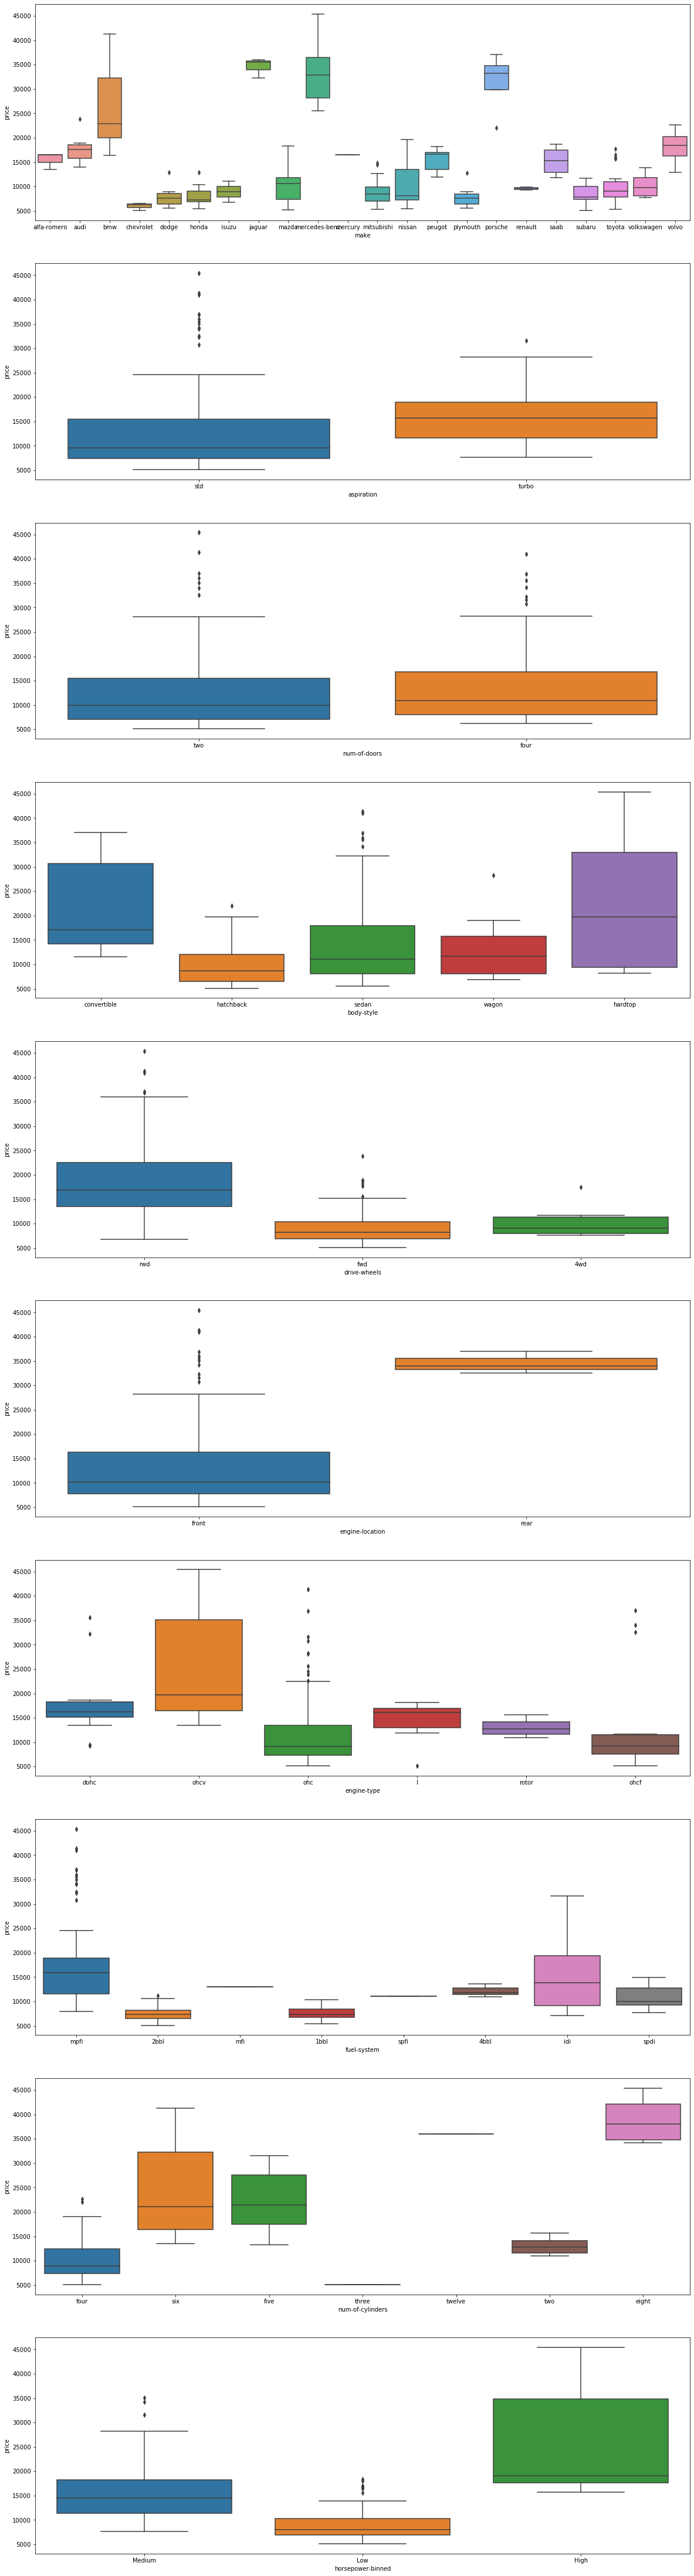

In [16]:
fig,axes = plt.subplots(10,1,figsize=(20,80))
count = 0
for i in range(10):
    sns.boxplot(x = df_cat.columns[count],y='price',data=df,ax=axes[i])
    count+=1

Conclusion, the following variables might be a good potential variable as a predictor of price:
- Drive-wheels
- Engine-location
    

## Correlation and Causation

### Pearson Correlation

In [20]:
from scipy import stats

In [26]:
numeric_df.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'diesel', 'gas'],
      dtype='object')

In [39]:
cols = ["wheel-base","length","width","height","curb-weight","engine-size","bore","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg"]
df_num = df[["wheel-base","length","width","height","curb-weight","engine-size","bore","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]]
df_num.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,0.811148,0.890278,48.8,2548,130,3.47,9.0,111.0,5000.0,21,27,13495.0
1,88.6,0.811148,0.890278,48.8,2548,130,3.47,9.0,111.0,5000.0,21,27,16500.0
2,94.5,0.822681,0.909722,52.4,2823,152,2.68,9.0,154.0,5000.0,19,26,16500.0
3,99.8,0.848630,0.919444,54.3,2337,109,3.19,10.0,102.0,5500.0,24,30,13950.0
4,99.4,0.848630,0.922222,54.3,2824,136,3.19,8.0,115.0,5500.0,18,22,17450.0


In [41]:
for i in range(len(cols)):
    pearson_coef,p_value = stats.pearsonr(df_num[cols[i]],df['price'])
    print("Pearson Co-efficeient for {}: \t\t".format(df_num.columns[i]),pearson_coef," and P-value : ",p_value)

Pearson Co-efficeient for wheel-base: 		 0.584641822265508  and P-value :  8.076488270733218e-20
Pearson Co-efficeient for length: 		 0.6906283804483638  and P-value :  8.016477466159556e-30
Pearson Co-efficeient for width: 		 0.7512653440522672  and P-value :  9.20033551048217e-38
Pearson Co-efficeient for height: 		 0.13548630756805974  and P-value :  0.055146273251013435
Pearson Co-efficeient for curb-weight: 		 0.8344145257702843  and P-value :  2.189577238894065e-53
Pearson Co-efficeient for engine-size: 		 0.8723351674455182  and P-value :  9.265491622200232e-64
Pearson Co-efficeient for bore: 		 0.5431553832626603  and P-value :  8.049189483935261e-17
Pearson Co-efficeient for compression-ratio: 		 0.07110732668194145  and P-value :  0.3158110188729282
Pearson Co-efficeient for horsepower: 		 0.8095745670036559  and P-value :  6.369057428260101e-48
Pearson Co-efficeient for peak-rpm: 		 -0.10161587407588148  and P-value :  0.1511769165144532
Pearson Co-efficeient for city-mpg: 	

From the above result we can conclude that :
- Wheel-base P-value is statistically significant but linear relationship is moderate
- Length P-value is statistically significant but linear relationship is moderate 
- Width P-value is statistically significant but linear relationship is strong 
- Curb-weight P-value is statistically significant but linear relationship is strong 
- Engine-size P-value is statistically significant but linear relationship is strong 
- Bore P-value is statistically significant but linear relationship is moderate 
- Horsepower P-value is statistically significant but linear relationship is strong 
- Highway-mpg P-value is statistically significant but linear relationship is strong and negatively related 
- City-mpg P-value is statistically significant but linear relationship is moderate and negatively related

# ANOVA

In [64]:
df_grp = df[['drive-wheels','price']]
df_grp.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0


In [66]:
df_grp = df_grp.groupby(['drive-wheels'])
df_grp.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


###### performing oneway anova

In [70]:

f_val,p_val = stats.f_oneway(df_grp.get_group('fwd')['price'],df_grp.get_group('rwd')['price'],df_grp.get_group('4wd')['price'])
print("ANOVA : F-value : ",f_val," and P-value: ",p_val)

ANOVA : F-value :  67.95406500780399  and P-value:  3.3945443577151245e-23


###### This is a great result because F-value shows large value which means there is a strong correlation

In [71]:
df['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [74]:
grp_engine = df[['engine-location','price']]
grp_engine = grp_engine.groupby(['engine-location'])
grp_engine.head()

,engine-location,price
0,front,13495.0
1,front,16500.0
2,front,16500.0
3,front,13950.0
4,front,17450.0
123,rear,32528.0
124,rear,34028.0
125,rear,37028.0


##### Anova for Engine-Location

In [77]:
f_val,p_val = stats.f_oneway(grp_engine.get_group('front')['price'],grp_engine.get_group('rear')['price'])
print("ANOVA : F-value : ",f_val," and P-value: ",p_val)

ANOVA : F-value :  24.495550318865693  and P-value:  1.583490019777699e-06


###### This is a great result because F-value shows large value which means there is a strong correlation

##  Conclusion (Important Variables) :

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

###### Numerical Variables
- Wheel-base 
- Length 
- Width 
- Curb-weight
- Engine-size
- Bore
- Horsepower
- Highway-mpg
- City-mpg

###### ategorical Variables
- Drive-wheels
- Engine-location